In [1]:
import pyclesperanto as cle
# import cupy as cp
import numpy as np
import time
# from fft_test_helper import get_next_smooth, pad

cle.select_device(1,"gpu")

(OpenCL) Apple M2 Max (OpenCL 1.2 )
	Vendor:                      Apple
	Driver Version:              1.2 1.0
	Device Type:                 GPU
	Compute Units:               30
	Global Memory Size:          21845 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4096 MB
	Max Clock Frequency:         1000 MHz
	Image Support:               Yes

In [5]:
# Function to benchmark FFT
def benchmark_fft(min_size=100, max_size=150, n=10):
    sizes = range(min_size, max_size+1, n)
    times = []
    times_smooth = []

    for size in sizes:
        # Create a random 2D array of the given size
        x = np.random.random((size, size)).astype(np.float32)
        next_smooth = cle.__experimental__.fft_smooth_shape([size, size])
        nx = next_smooth[1] - size
        ny = next_smooth[0] - size
       
        cx = cle.push(x)
        cx_padded = cle.__experimental__.pad(x, x_pad=nx, y_pad=ny, center=True)
        
        # Perform FFT n times and measure the time taken
        start_time = time.time()
        for _ in range(n):
            toto = cle.__experimental__.fft(cx, None)
        end_time = time.time()

        start_time_smooth = time.time()
        for _ in range(n):
            _ = cle.__experimental__.fft(cx_padded, None)
        end_time_smooth = time.time()
        
        # Calculate the average time per FFT
        avg_time = (end_time - start_time) / n
        avg_time_smooth = (end_time_smooth - start_time_smooth) / n
        times.append(avg_time)
        times_smooth.append(avg_time_smooth)
        print(f"Size: {size}x{size}, Smooth Size: {next_smooth[0]}, Avg Time: {avg_time:.6f} seconds, Avg Time Smooth: {avg_time_smooth:.6f} seconds")

    return sizes, times, times_smooth

# Run the benchmark
sizes, cle_times, cle_times_smooth = benchmark_fft(1010, 1024, 1)

Size: 1010x1010, Smooth Size: 1024, Avg Time: 0.018931 seconds, Avg Time Smooth: 0.008149 seconds
Size: 1011x1011, Smooth Size: 1024, Avg Time: 0.018344 seconds, Avg Time Smooth: 0.006949 seconds
Size: 1012x1012, Smooth Size: 1024, Avg Time: 0.015537 seconds, Avg Time Smooth: 0.006252 seconds
Size: 1013x1013, Smooth Size: 1024, Avg Time: 0.025680 seconds, Avg Time Smooth: 0.006275 seconds
Size: 1014x1014, Smooth Size: 1024, Avg Time: 0.010305 seconds, Avg Time Smooth: 0.005695 seconds
Size: 1015x1015, Smooth Size: 1024, Avg Time: 0.009437 seconds, Avg Time Smooth: 0.006430 seconds
Size: 1016x1016, Smooth Size: 1024, Avg Time: 0.016036 seconds, Avg Time Smooth: 0.005627 seconds
Size: 1017x1017, Smooth Size: 1024, Avg Time: 0.013977 seconds, Avg Time Smooth: 0.005440 seconds
Size: 1018x1018, Smooth Size: 1024, Avg Time: 0.022692 seconds, Avg Time Smooth: 0.005570 seconds
Size: 1019x1019, Smooth Size: 1024, Avg Time: 0.020758 seconds, Avg Time Smooth: 0.005396 seconds
Size: 1020x1020, Smo

In [4]:
# Function to benchmark FFT
def benchmark_fft(min_size=100, max_size=150, n=10):
    sizes = range(min_size, max_size +1, n)
    times = []
    times_smooth = []

    for size in sizes:
        # Create a random 2D array of the given size
        x = np.random.random((size, size)).astype(cp.float32)
        next_smooth = get_next_smooth([size, size])
        x_padded, _ = pad(x, next_smooth, "constant")

        cx = cp.asarray(x)
        cx_padded = cp.asarray(x_padded)
        
        # Perform FFT n times and measure the time taken
        start_time = time.time()
        for _ in range(n):
            _ = cp.fft.fft2(cx)
        end_time = time.time()

        start_time_smooth = time.time()
        for _ in range(n):
            _ = cp.fft.fft2(cx_padded)
        end_time_smooth = time.time()
        
        # Calculate the average time per FFT
        avg_time = (end_time - start_time) / n
        avg_time_smooth = (end_time_smooth - start_time_smooth) / n
        times.append(avg_time)
        times_smooth.append(avg_time_smooth)
        print(f"Size: {size}x{size}, Smooth Size: {next_smooth[0]}, Avg Time: {avg_time:.6f} seconds, Avg Time Smooth: {avg_time_smooth:.6f} seconds")
        
    return sizes, times, times_smooth

# Run the benchmark
sizes, cp_times, cp_times_smooth = benchmark_fft(1010, 1024, 1)


Size: 1010x1010, Smooth Size: 1024, Avg Time: 0.018222 seconds, Avg Time Smooth: 0.010045 seconds
Size: 1011x1011, Smooth Size: 1024, Avg Time: 0.002176 seconds, Avg Time Smooth: 0.000122 seconds
Size: 1012x1012, Smooth Size: 1024, Avg Time: 0.000681 seconds, Avg Time Smooth: 0.000050 seconds
Size: 1013x1013, Smooth Size: 1024, Avg Time: 0.001771 seconds, Avg Time Smooth: 0.000049 seconds
Size: 1014x1014, Smooth Size: 1024, Avg Time: 0.000827 seconds, Avg Time Smooth: 0.000128 seconds
Size: 1015x1015, Smooth Size: 1024, Avg Time: 0.000703 seconds, Avg Time Smooth: 0.000054 seconds
Size: 1016x1016, Smooth Size: 1024, Avg Time: 0.000745 seconds, Avg Time Smooth: 0.000112 seconds
Size: 1017x1017, Smooth Size: 1024, Avg Time: 0.000692 seconds, Avg Time Smooth: 0.000129 seconds
Size: 1018x1018, Smooth Size: 1024, Avg Time: 0.001751 seconds, Avg Time Smooth: 0.000050 seconds
Size: 1019x1019, Smooth Size: 1024, Avg Time: 0.001716 seconds, Avg Time Smooth: 0.000156 seconds
Size: 1020x1020, Smo

In [5]:

# Plot the results# Function to benchmark FFT
def benchmark_fft(min_size=100, max_size=150, n=10):
    sizes = range(min_size, max_size +1, n)
    times = []
    times_smooth = []

    for size in sizes:
        # Create a random 2D array of the given size
        x = np.random.random((size, size)).astype(cp.float32)
        next_smooth = get_next_smooth([size, size])
        x_padded, _ = pad(x, next_smooth, "constant")
        
        # Perform FFT n times and measure the time taken
        start_time = time.time()
        for _ in range(n):
            _ = np.fft.fft2(x)
        end_time = time.time()

        start_time_smooth = time.time()
        for _ in range(n):
            _ = np.fft.fft2(x_padded)
        end_time_smooth = time.time()
        
        # Calculate the average time per FFT
        avg_time = (end_time - start_time) / n
        avg_time_smooth = (end_time_smooth - start_time_smooth) / n
        times.append(avg_time)
        times_smooth.append(avg_time_smooth)
        print(f"Size: {size}x{size}, Smooth Size: {next_smooth[0]}, Avg Time: {avg_time:.6f} seconds, Avg Time Smooth: {avg_time_smooth:.6f} seconds")
        
    return sizes, times, times_smooth

# Run the benchmark
sizes, times, times_smooth = benchmark_fft(1010, 1024, 1)

Size: 1010x1010, Smooth Size: 1024, Avg Time: 0.034519 seconds, Avg Time Smooth: 0.019877 seconds
Size: 1011x1011, Smooth Size: 1024, Avg Time: 0.030813 seconds, Avg Time Smooth: 0.022114 seconds
Size: 1012x1012, Smooth Size: 1024, Avg Time: 0.016108 seconds, Avg Time Smooth: 0.022133 seconds
Size: 1013x1013, Smooth Size: 1024, Avg Time: 0.031160 seconds, Avg Time Smooth: 0.022186 seconds
Size: 1014x1014, Smooth Size: 1024, Avg Time: 0.016546 seconds, Avg Time Smooth: 0.021979 seconds
Size: 1015x1015, Smooth Size: 1024, Avg Time: 0.017988 seconds, Avg Time Smooth: 0.019285 seconds
Size: 1016x1016, Smooth Size: 1024, Avg Time: 0.043828 seconds, Avg Time Smooth: 0.022598 seconds
Size: 1017x1017, Smooth Size: 1024, Avg Time: 0.034566 seconds, Avg Time Smooth: 0.022882 seconds
Size: 1018x1018, Smooth Size: 1024, Avg Time: 0.044162 seconds, Avg Time Smooth: 0.020950 seconds
Size: 1019x1019, Smooth Size: 1024, Avg Time: 0.033958 seconds, Avg Time Smooth: 0.018941 seconds
Size: 1020x1020, Smo

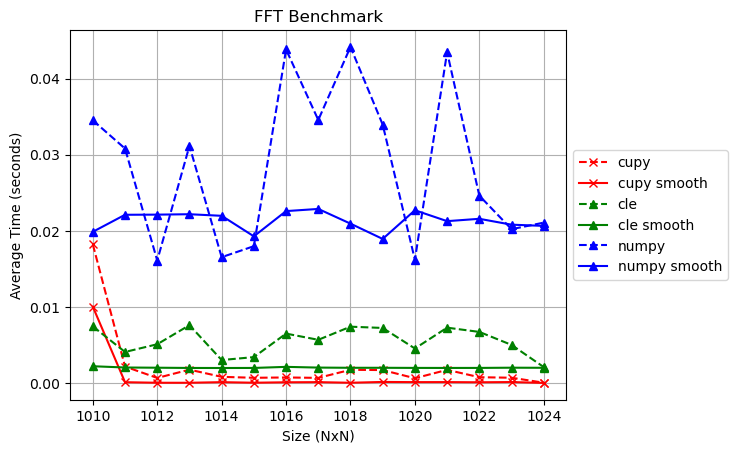

In [8]:

import matplotlib.pyplot as plt

plt.plot(sizes, cp_times, marker='x', color='r', linestyle='--', label="cupy")
plt.plot(sizes, cp_times_smooth, marker='x', color='r', label="cupy smooth")
plt.plot(sizes, cle_times, marker='^', color='g', linestyle='--', label="cle")
plt.plot(sizes, cle_times_smooth, marker='^', color='g', label="cle smooth")
plt.plot(sizes, times, marker='^', color='b', linestyle='--', label="numpy")
plt.plot(sizes, times_smooth, marker='^', color='b', label="numpy smooth")
plt.xlabel('Size (NxN)')
plt.ylabel('Average Time (seconds)')
plt.title('FFT Benchmark')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

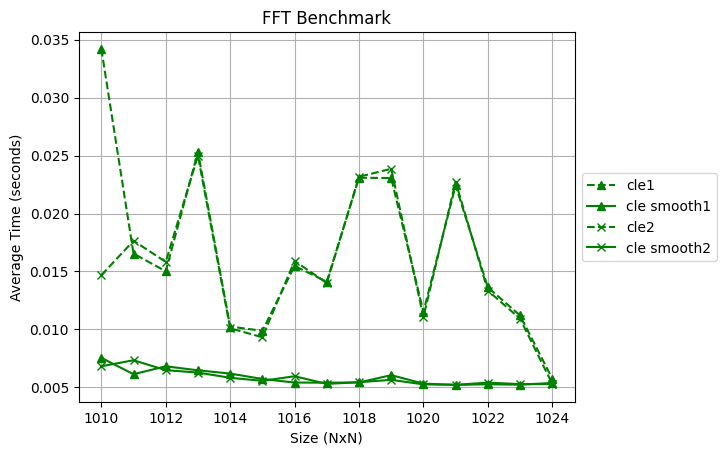

In [5]:
import matplotlib.pyplot as plt

plt.plot(sizes, cp_times, marker='x', color='r', linestyle='--', label="cupy")
plt.plot(sizes, cp_times_smooth, marker='x', color='r', label="cupy smooth")
plt.plot(sizes, cle_times, marker='^', color='g', linestyle='--', label="cle1")
plt.plot(sizes, cle_times_smooth, marker='^', color='g', label="cle smooth1")
plt.xlabel('Size (NxN)')
plt.ylabel('Average Time (seconds)')
plt.title('FFT Benchmark')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()